## Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Funções

In [ ]:
def calc_Zp_Maa(eta, t, phi, d, rho_0, omega, Z_0, D, c_0):
  omega = omega*2*np.pi
  k_0 =(omega)/c_0
  s =d*np.sqrt((rho_0*omega)/(4*eta))
  # s = np.array([max(1, min(10, x)) for x in s_raw])
  ep = 1.1284*np.sqrt(phi)
  F_ep = (1-(1.4092*ep)+(0.33818*(ep**3))+(0.06793*(ep**5))-(0.02287*(ep**6))+(0.03015*(ep**7))-(0.01641*(ep**8)))**(-1)
  Zp = 0
  Zp += (((32*eta*t)/(phi*(d**2)))*np.sqrt(1+((s**2)/32))) +1j*0
  Zp += ((1j*omega*rho_0*t)/phi)*(1+((np.sqrt(9+((s**2)/2)))**(-1)))
  Zp += (np.sqrt(2)*eta*s)/(phi*d)
  Zp += (1j*0.85*omega*rho_0*d)/(phi*F_ep)
  Zp += -1j*Z_0*(1/np.tan(k_0*D))
  return Zp

In [ ]:
def calc_Zp_Atalla(eta, t, phi, d, rho_0, omega, Z_0, D, c_0):
  omega = omega*2*np.pi
  k_0 =(omega)/c_0
  ep_0 = 0.85*(d/2)
  ep_e = ep_0*(1-(1.14*np.sqrt(phi)))
  alpha_inf = 1+((2*ep_e)/t)
  sigma = (8*eta)/(phi*((d/2)**2))
  coef = 1j*((omega*rho_0*alpha_inf*t)/(phi))
  inner = ((sigma*phi)/(1j*omega*rho_0*alpha_inf))*np.sqrt(1+((1j*4*omega*rho_0*(alpha_inf**2)*eta)/((sigma**2)*(phi**2)*((d/2)**2))))
  Zp = 0
  Zp += coef*(1+inner)
  Zp += -1j*Z_0*(1/np.tan(k_0*D))
  return Zp

In [ ]:
def find_crossings(y, value=0.5):
    """
    Encontra os pontos onde a curva cruza o valor especificado.
    """
    indices = np.where(np.diff(np.sign(y - value)))[0]
    crossings = []
    for idx in indices:
        # Interpolação linear para uma estimativa mais precisa do ponto de cruzamento
        x1, x2 = omega[idx], omega[idx + 1]
        y1, y2 = y[idx], y[idx + 1]
        x_cross = x1 + (value - y1) * (x2 - x1) / (y2 - y1)
        crossings.append(x_cross)
    return crossings

## Comparação entre Modelos Maa e Atalla

In [ ]:
## Propriedades do Fluido
eta = 1.84e-5 #Viscosidade Dinãmica do ar
rho_0 = 1.21 #Densidade do Fluido
c_0 = 343.6 #Velocidade do Som
Z_0 = rho_0*c_0 #Impedância do ar

In [ ]:
## Definição do Vetor de Frequência
omega = np.arange(100, 5000, 1)
## Definindo os Parâmetros dos Paineis Testados
all_d = [0.5e-3, 0.26e-3, 0.1e-3]
all_t = [0.5e-3, 0.26e-3, 0.1e-3]
all_phi = [0.5e-2, 0.9e-2, 1.8e-2]
all_D = [1e-2, 2e-2, 3e-2]
alpha_Maa = []
alpha_Atalla = []
for d, t, phi, D in zip(all_d, all_t, all_phi, all_D):
  Zp_var_Maa = calc_Zp_Maa(
                  eta=eta,
                  t=t,
                  phi=phi,
                  d=d,
                  rho_0=rho_0,
                  omega=omega,
                  Z_0=Z_0,
                  D=D,
                  c_0=c_0
              )
  alpha_var_Maa = 1-(np.abs((Zp_var_Maa-Z_0)/(Zp_var_Maa+Z_0))**2)
  alpha_Maa.append(alpha_var_Maa)

  Zp_var_Atalla = calc_Zp_Atalla(
                      eta=eta,
                      t=t,
                      phi=phi,
                      d=d,
                      rho_0=rho_0,
                      omega=omega,
                      Z_0=Z_0,
                      D=D,
                      c_0=c_0
                  )
  alpha_var_Atalla = 1-(np.abs((Zp_var_Atalla-Z_0)/(Zp_var_Atalla+Z_0))**2)
  alpha_Atalla.append(alpha_var_Atalla)

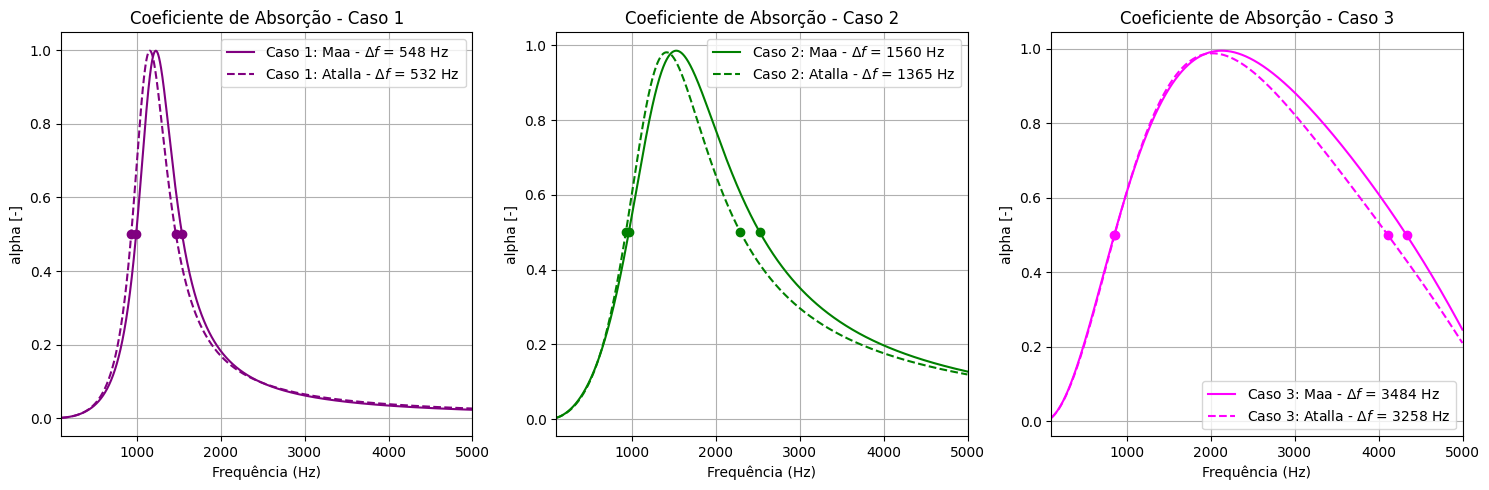

In [ ]:
## Plotagem dos Coeficientes de Absorção
colors = ['purple', 'green', 'magenta']
labels_Maa = ['Caso 1: Maa', 'Caso 2: Maa', 'Caso 3: Maa']
labels_Atalla = ['Caso 1: Atalla', 'Caso 2: Atalla', 'Caso 3: Atalla']
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    crossings = find_crossings(alpha_Maa[i])
    for cross in crossings:
        plt.plot(cross, 0.5, 'o', color=colors[i])
    plt.plot(omega, alpha_Maa[i], label=labels_Maa[i]+f' - $\Delta f$ = {round(crossings[1]-crossings[0])} Hz', color=colors[i], linestyle='-')
    crossings = find_crossings(alpha_Atalla[i])
    for cross in crossings:
        plt.plot(cross, 0.5, 'o', color=colors[i])
    plt.plot(omega, alpha_Atalla[i], label=labels_Atalla[i]+f' - $\Delta f$ = {round(crossings[1]-crossings[0])} Hz', color=colors[i], linestyle='--')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('alpha [-]')
    plt.title(f'Coeficiente de Absorção - Caso {i + 1}')
    plt.xlim([100,5000])
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()